In [24]:
import glob
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
colors = sns.color_palette("tab10")

from matplotlib import animation
from IPython.display import HTML

In [25]:
p_dict = {
    1: 0.15967,
    2: 0.32865,
    3: 0.416,
    4: 0.458,
    5: 0.4792
}
h0 = np.sqrt(3) / 2 / np.pi
nu = 4 / 3

In [26]:
def load_data(nu = nu):
    x_data_list = [np.array([])] * 5
    y_data_list = [np.array([])] * 5

    for f in glob.glob("data/*_entropies_all.npy"):
        fn = f[5:].split("_")[:-2]
        L = int(fn[0])
        # depth = int(fn[1])
        # shots = int(fn[2])
        p = float(fn[3])
        M = int(fn[4])
        D = 2 ** M
        if p != p_dict[M]:
            continue
        xi = D ** nu

        # print(f)
        data = np.load(f)[-2, :]

        x_data_list[M - 1] = np.append(x_data_list[M - 1], L / xi)
        y_data_list[M - 1] = np.append(y_data_list[M - 1], data[data.shape[0]//2-1] - h0 * nu * (np.log(D))**2)

    return x_data_list, y_data_list

In [27]:
def make_plot():
    plt.subplots(figsize = (8, 6), layout = "constrained")

    x_data_list, y_data_list = load_data()

    filename = "figs/crossover.png"

    for i in range(5):
        x = x_data_list[i]
        y = y_data_list[i]
        ind = np.argsort(x)
        x = x[ind]
        y = y[ind]
        plt.plot(x, y, marker = ".", color = colors[i], label = "$D={}$".format(2**(i+1)))

    plt.xlabel(r"$L/\xi_*$")
    plt.ylabel(r"$S(L,p=p_c,D)-h_0\nu_*(\ln{D})^2$")
    plt.title("Crossover Scaling")
    plt.legend()
    plt.minorticks_on()
    plt.xscale("log")
    plt.savefig(filename, dpi = 300)
    plt.show()

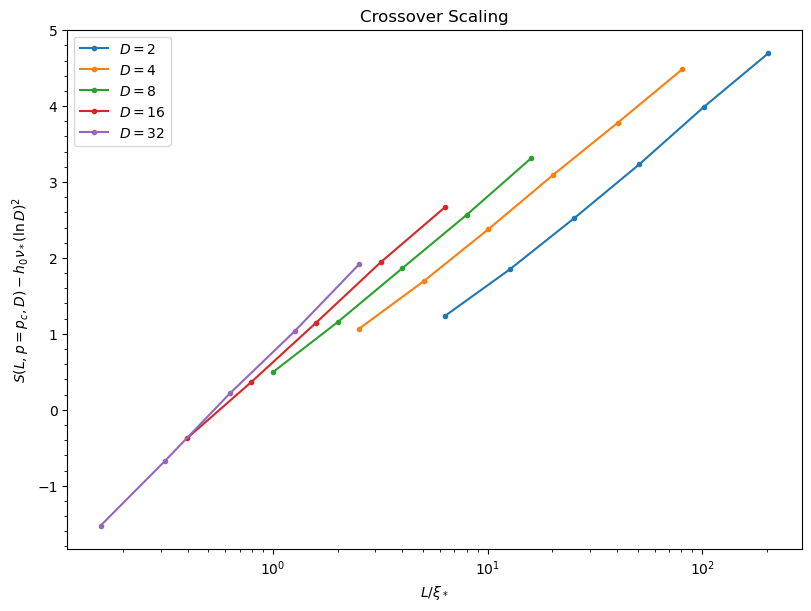

In [28]:
make_plot()

In [29]:
def make_anim():
    nu_l = 0.8
    fig, ax = plt.subplots(figsize=(8, 6), layout = "constrained")
    scats = []

    x_data_list, y_data_list = load_data(nu = nu_l)

    for i, (x, y) in enumerate(zip(x_data_list, y_data_list)):
        ind = np.argsort(x)
        x = x[ind]
        y = y[ind]
        scats.append(ax.plot(x, y, marker = ".", label = "$D={}$".format(2**(i+1)), color = colors[i])[0])
    ax.set(xlim = (0.1, 1000), ylim = (-2, 6), xscale = "log",
        xlabel = r"$L/\xi_*$",
        ylabel = r"$S(L,p=p_c,D)-h_0\nu_*(\ln{D})^2$",
        title = "Crossover Scaling, $\\nu={:.3f}$".format(nu_l))
    ax.legend(loc = "upper left")
    plt.close()

    def update(frame):
        nu = nu_l + 0.01 * frame
        ax.set_title("Crossover Scaling, $\\nu={:.3f}$".format(nu))
        x_data_list, y_data_list = load_data(nu = nu)
        for i, (x, y) in enumerate(zip(x_data_list, y_data_list)):
            ind = np.argsort(x)
            x = x[ind]
            y = y[ind]
            scats[i].set_data(x,y)
        return scats

    ani = animation.FuncAnimation(fig, update, frames = 120, interval = 20, blit = True)
    return ani

In [30]:
ani = make_anim()
HTML(ani.to_jshtml())